In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Make plots look cleaner
sns.set(style="whitegrid")


In [19]:
# Load your CSV file (replace filename with your actual file name)
df = pd.read_csv("dynamic_pricing.csv")

# Show first 5 rows
df.head()


,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [20]:
# Basic structure
df.info()

# Summary statistics for numeric columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB


,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


In [21]:
# Select only numeric columns
num_cols = df.select_dtypes(include=np.number).columns

# Create a dictionary to store outlier counts
outlier_counts = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
    outlier_counts[col] = outliers.shape[0]

print("Outlier count in each numeric column:\n")
for col, count in outlier_counts.items():
    print(f"{col}: {count} outliers")


Outlier count in each numeric column:

Number_of_Riders: 0 outliers
Number_of_Drivers: 10 outliers
Number_of_Past_Rides: 0 outliers
Average_Ratings: 0 outliers
Expected_Ride_Duration: 0 outliers
Historical_Cost_of_Ride: 0 outliers


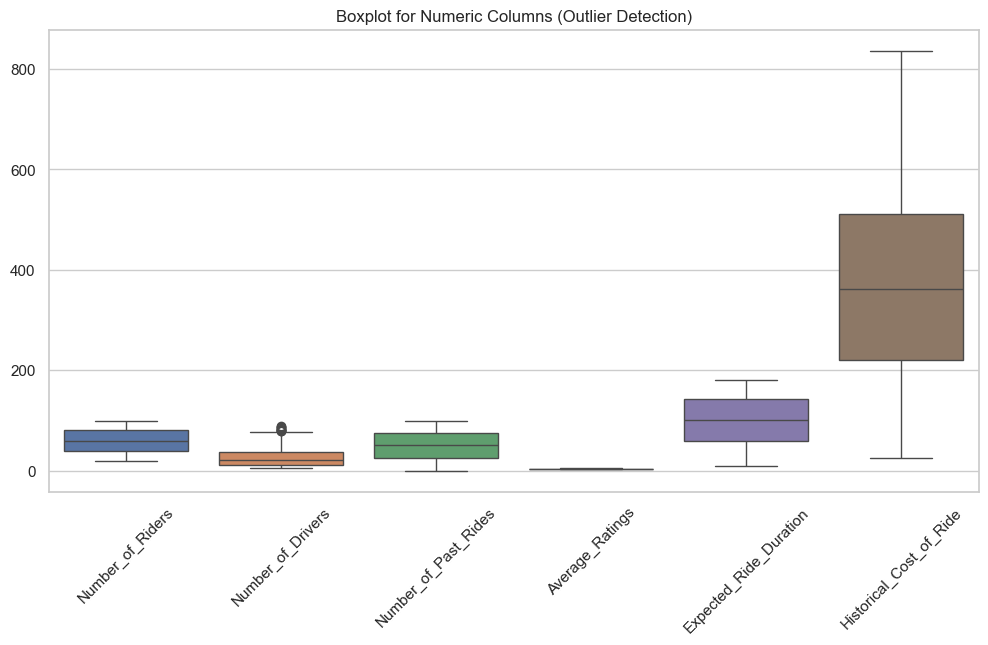

In [22]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.title("Boxplot for Numeric Columns (Outlier Detection)")
plt.xticks(rotation=45)
plt.show()


In [23]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr = numeric_df.corr()

# Display correlation matrix
print("Correlation Matrix:\n")
print(corr)


Correlation Matrix:

                         Number_of_Riders  Number_of_Drivers  \
Number_of_Riders                 1.000000           0.627016   
Number_of_Drivers                0.627016           1.000000   
Number_of_Past_Rides             0.029265           0.039660   
Average_Ratings                  0.008572           0.041204   
Expected_Ride_Duration          -0.015856          -0.024418   
Historical_Cost_of_Ride          0.005826           0.017082   

                         Number_of_Past_Rides  Average_Ratings  \
Number_of_Riders                     0.029265         0.008572   
Number_of_Drivers                    0.039660         0.041204   
Number_of_Past_Rides                 1.000000        -0.064734   
Average_Ratings                     -0.064734         1.000000   
Expected_Ride_Duration               0.030679        -0.016968   
Historical_Cost_of_Ride              0.035859        -0.001063   

                         Expected_Ride_Duration  Historical_Cost_of

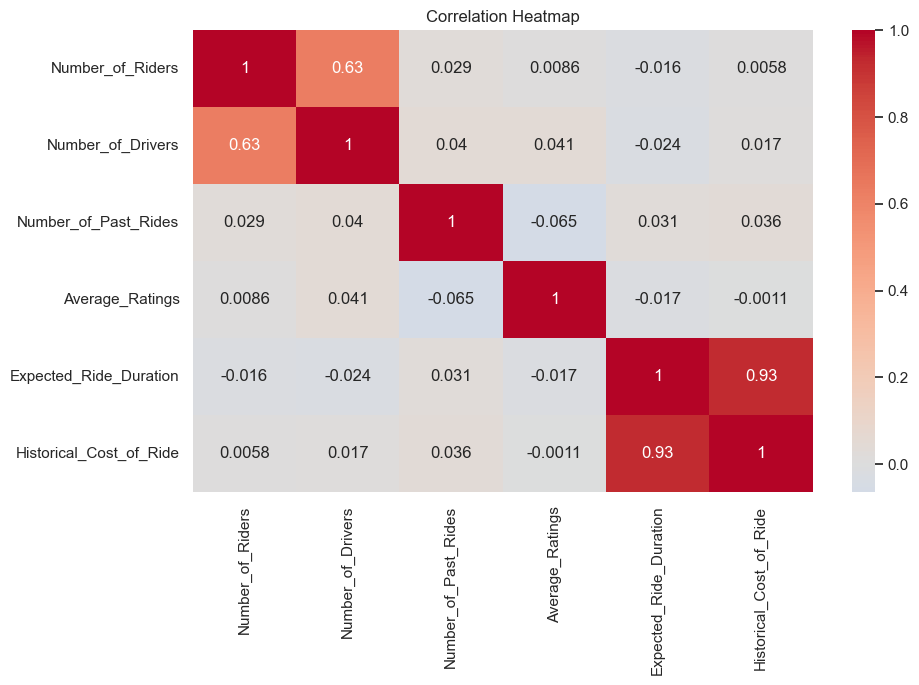

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()



In [25]:
from sklearn.preprocessing import LabelEncoder

# Make a copy to avoid overwriting the original DataFrame
df_encoded = df.copy()

# Identify categorical columns
cat_cols = df_encoded.select_dtypes(include=['object']).columns
print("Categorical Columns:\n", cat_cols)

# Apply Label Encoding for simplicity
le = LabelEncoder()

for col in cat_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

print("\n✅ Label encoding complete!")
df_encoded.head()


Categorical Columns:
 Index(['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking',
       'Vehicle_Type'],
      dtype='object')

✅ Label encoding complete!


,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,2,2,13,4.47,3,1,90,284.257273
1,58,39,1,2,72,4.06,1,0,43,173.874753
2,42,31,0,2,0,3.99,0,1,76,329.795469
3,89,28,0,1,67,4.31,0,1,134,470.201232
4,78,22,0,1,74,3.77,0,0,149,579.681422


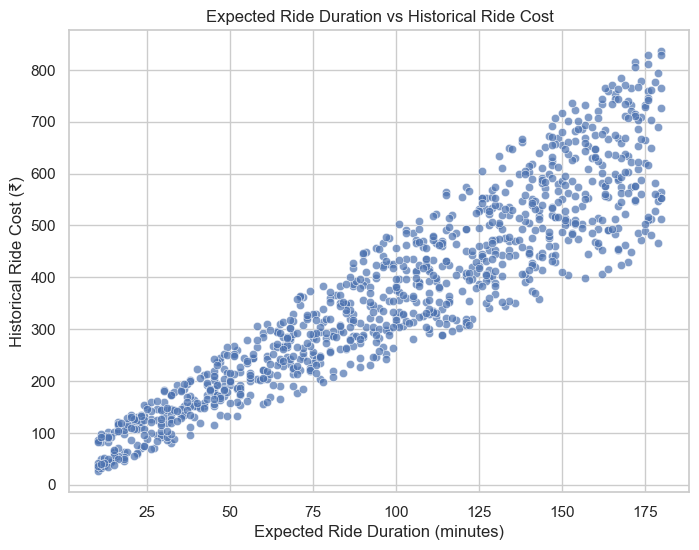

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_encoded, x='Expected_Ride_Duration', y='Historical_Cost_of_Ride', alpha=0.7)
plt.title("Expected Ride Duration vs Historical Ride Cost")
plt.xlabel("Expected Ride Duration (minutes)")
plt.ylabel("Historical Ride Cost (₹)")
plt.show()


Average Historical Ride Cost by Location Category:
 Location_Category
0    379.942172
1    374.319486
2    363.673259
Name: Historical_Cost_of_Ride, dtype: float64


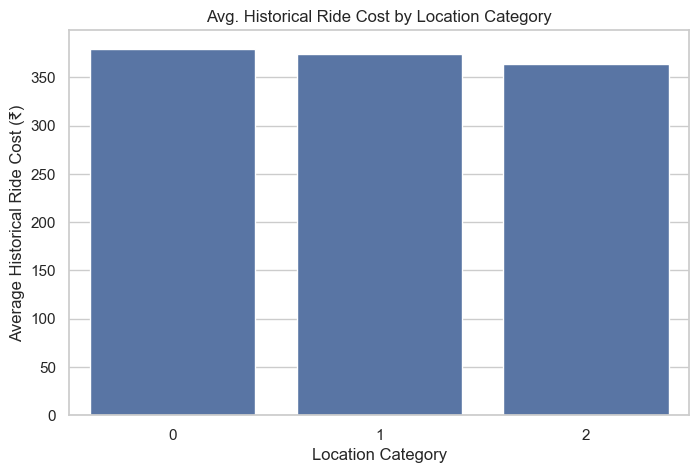

In [27]:
# Example: Average historical ride cost by location category
group_loc = df_encoded.groupby('Location_Category')['Historical_Cost_of_Ride'].mean().sort_values(ascending=False)
print("Average Historical Ride Cost by Location Category:\n", group_loc)

# Visualization
plt.figure(figsize=(8,5))
sns.barplot(x=group_loc.index, y=group_loc.values)
plt.title("Avg. Historical Ride Cost by Location Category")
plt.xlabel("Location Category")
plt.ylabel("Average Historical Ride Cost (₹)")
plt.show()


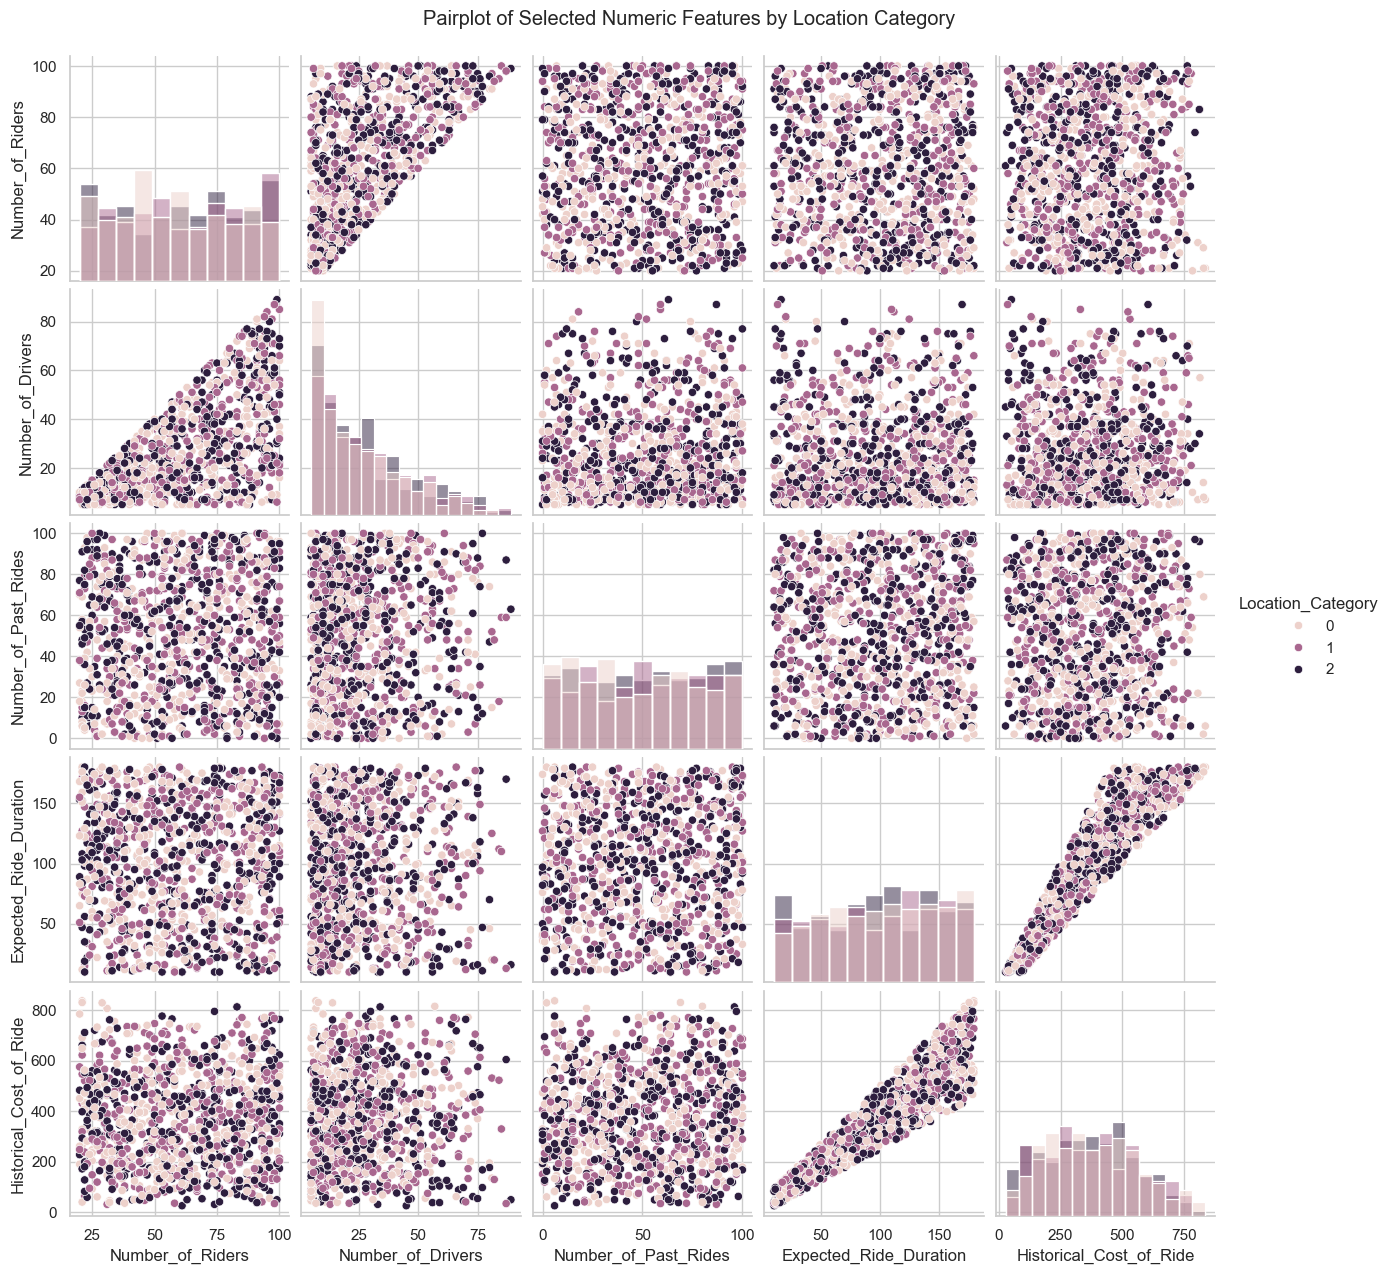

In [28]:
# Select a subset of numeric variables of interest
cols_for_pair = ['Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride']

# Create the pairplot, colored by Location_Category
sns.pairplot(df_encoded, vars=cols_for_pair, hue='Location_Category', diag_kind='hist', height=2.5)
plt.suptitle("Pairplot of Selected Numeric Features by Location Category", y=1.02)
plt.show()


In [33]:
# Check missing values
print(df.isnull().sum())

# Fill numeric columns
for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].fillna(df[col].median())  # median is safer for skewed data

# Fill categorical columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
 # mode for categorical

Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64
